In [1]:
# Data Collection and Transformations
import numpy as np
import pandas as pd
import datetime as dt
import time
import pickle
from sklearn.preprocessing import Imputer, StandardScaler
from itertools import cycle

# Statistical Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy

# Class imbalance 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

# Classification
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.pipeline import Pipeline

# Plotting 
from mlxtend.plotting import plot_learning_curves
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize'] = [10,8]
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
X_pca_crossval = pd.read_csv("data_out/X_pca_crossval.csv",index_col=0)
y_crossval = pd.read_csv("data_out/y_crossval.csv",index_col=0)

X_pca_holdout = pd.read_csv("data_out/X_pca_holdout.csv",index_col=0)
y_holdout = pd.read_csv("data_out/y_holdout.csv",index_col=0)

X_raw_crossval = pd.read_csv("data_out/X_raw_crossval.csv",index_col=0)
X_raw_holdout = pd.read_csv("data_out/X_raw_holdout.csv",index_col=0)

X_pca_crossval.shape,y_crossval.shape,X_pca_holdout.shape,y_holdout.shape

((17874, 150), (17874, 6), (1987, 150), (1987, 6))

In [3]:
X_raw_crossval.fillna(value=100,inplace=True)
X_raw_holdout.fillna(value=100,inplace=True)

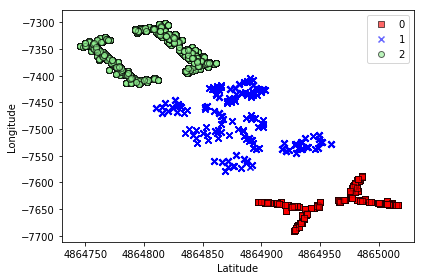

In [4]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_crossval['BUILDINGID']))])

for idx, cl in enumerate(np.unique(y_crossval['BUILDINGID'])):
        plt.scatter(x=y_crossval.loc[y_crossval.BUILDINGID== cl]['LATITUDE'], 
                    y=y_crossval.loc[y_crossval.BUILDINGID== cl]['LONGITUDE'],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc='upper right')
plt.tight_layout()

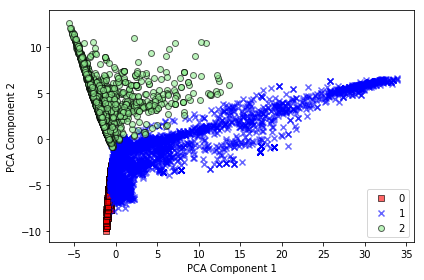

In [5]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_crossval['BUILDINGID']))])

for idx, cl in enumerate(np.unique(y_crossval['BUILDINGID'])):
        plt.scatter(x=X_pca_crossval.loc[y_crossval.BUILDINGID== cl].iloc[:,0], 
                    y=X_pca_crossval.loc[y_crossval.BUILDINGID== cl].iloc[:,1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='lower right')
plt.tight_layout()

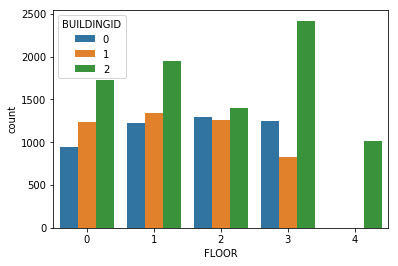

In [6]:
sns.countplot(x="FLOOR", hue="BUILDINGID", data=y_crossval,orient="v")

# Building

In [7]:
X_train = np.array(X_pca_crossval)
y_train = y_crossval['BUILDINGID']

X_test = np.array(X_pca_holdout)
y_test =  y_holdout['BUILDINGID']

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((17874, 150), (17874,), (1987, 150), (1987,))

# Random Forest

เป็นการใช้เทคนิค decision tree ด้วยการสุ่มแอตทริบิวในการสร้างโมเดล

In [39]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None,min_impurity_split=1e-07, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
rf.fit(X_train,y_train)
pred_test = rf.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_test, pred_test)))

Prediction accuracy for the test dataset
100.00%


In [38]:
for i in range(0, 5):
    print('Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_test)[i],pred_test[i]))

Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1


In [42]:
print ('Train Accuracy :: ', accuracy_score(y_train, rf.predict(X_train)))
print ('Test Accuracy  :: ', accuracy_score(y_test, pred_test))

Train Accuracy ::  1.0
Test Accuracy  ::  1.0


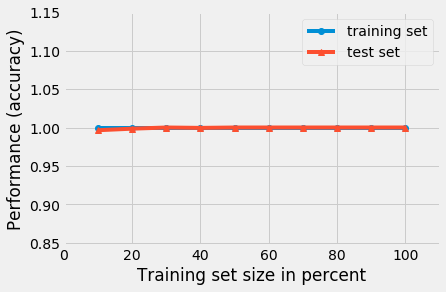

In [43]:
plot_learning_curves(X_train, y_train,
                     X_test, y_test,
                     rf, scoring = 'accuracy',
                     print_model = False)
plt.show()

# Gaussian Naïve Bayes

In [44]:
clf = GaussianNB()

In [45]:
clf.fit(X_train, y_train)
pred_test_gnb = clf.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_test, pred_test_gnb)))

Prediction accuracy for the test dataset
95.62%


In [46]:
for i in range(0, 5):
    print('Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_test)[i],pred_test_gnb[i]))

Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1


In [47]:
print ('Train Accuracy :: ', accuracy_score(y_train, clf.predict(X_train)))
print ('Test Accuracy  :: ', accuracy_score(y_test, pred_test_gnb))

Train Accuracy ::  0.9575360859348775
Test Accuracy  ::  0.9562154001006542


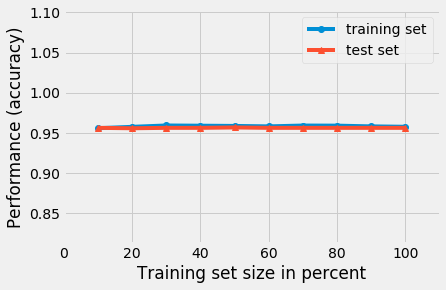

In [48]:
plot_learning_curves(X_train, y_train,
                     X_test, y_test,
                     clf, scoring = 'accuracy',
                     print_model = False)
plt.show()

# Stochastic Gradient Descent

In [49]:
sgd = SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,eta0=0.0, fit_intercept=True, l1_ratio=0.15,learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,n_jobs=1, penalty='l2', power_t=0.5, random_state=None,shuffle=True, tol=None, verbose=0, warm_start=False)

In [50]:
sgd.fit(X_train, y_train)
pred_test_sgd = sgd.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_test, pred_test_sgd)))

Prediction accuracy for the test dataset
100.00%


In [51]:
for i in range(0, 5):
    print('Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_test)[i],pred_test_sgd[i]))

Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1


In [52]:
print ('Train Accuracy :: ', accuracy_score(y_train, sgd.predict(X_train)))
print ('Test Accuracy  :: ', accuracy_score(y_test, pred_test_sgd))

Train Accuracy ::  1.0
Test Accuracy  ::  1.0


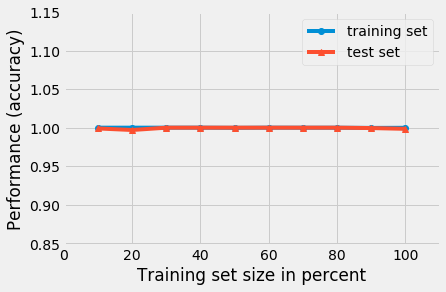

In [53]:
plot_learning_curves(X_train, y_train,
                     X_test, y_test,
                     sgd, scoring = 'accuracy',
                     print_model = False)
plt.show()

# Support Vector Classification

In [54]:
svc = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)

In [55]:
svc.fit(X_train, y_train)
pred_test_svc = svc.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_test, pred_test_svc)))

Prediction accuracy for the test dataset
100.00%


In [56]:
for i in range(0, 5):
    print('Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_test)[i],pred_test_svc[i]))

Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1


In [57]:
print ('Train Accuracy :: ', accuracy_score(y_train, svc.predict(X_train)))
print ('Test Accuracy  :: ', accuracy_score(y_test, pred_test_svc))

Train Accuracy ::  1.0
Test Accuracy  ::  1.0


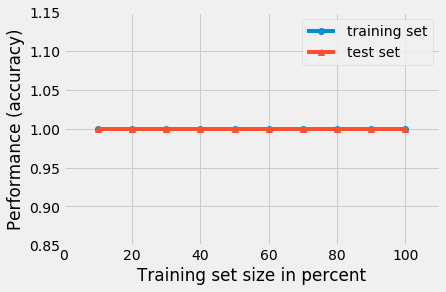

In [58]:
plot_learning_curves(X_train, y_train,
                     X_test, y_test,
                     svc, scoring = 'accuracy',
                     print_model = False)
plt.show()

# Floor

In [59]:
X_train = np.array(X_pca_crossval)
y_floor_train = y_crossval['FLOOR']

X_test = np.array(X_pca_holdout)
y_floor_test =  y_holdout['FLOOR']

X_train.shape,y_floor_train.shape,X_test.shape,y_floor_test.shape

((17874, 150), (17874,), (1987, 150), (1987,))

# Random Forest

In [60]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None,min_impurity_split=1e-07, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)

In [61]:
rf.fit(X_train,y_floor_train)
pred_test = rf.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_floor_test, pred_test)))

Prediction accuracy for the test dataset
97.63%


In [62]:
for i in range(0, 5):
    print('Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_floor_test)[i],pred_test[i]))

Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 3 and Predicted outcome :: 3
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1


In [63]:
print ('Train Accuracy :: ', accuracy_score(y_floor_train, rf.predict(X_train)))
print ('Test Accuracy  :: ', accuracy_score(y_floor_test, pred_test))

Train Accuracy ::  1.0
Test Accuracy  ::  0.9763462506290891


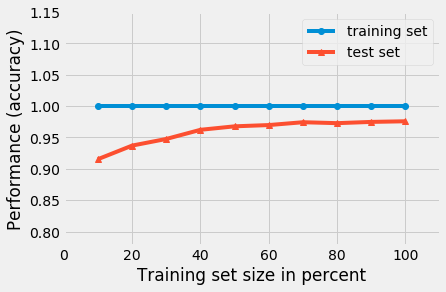

In [64]:
plot_learning_curves(X_train, y_floor_train,
                     X_test, y_floor_test,
                     rf, scoring = 'accuracy',
                     print_model = False)
plt.show()

# Gaussian Naïve Bayes

In [65]:
clf = GaussianNB()

In [66]:
clf.fit(X_train, y_floor_train)
pred_test_gnb = clf.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_floor_test, pred_test_gnb)))

Prediction accuracy for the test dataset
45.29%


In [67]:
for i in range(0, 5):
    print('Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_floor_test)[i],pred_test_gnb[i]))

Actual outcome :: 0 and Predicted outcome :: 2
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 3 and Predicted outcome :: 3
Actual outcome :: 2 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1


In [68]:
print ('Train Accuracy :: ', accuracy_score(y_floor_train, clf.predict(X_train)))
print ('Test Accuracy  :: ', accuracy_score(y_floor_test, pred_test_gnb))

Train Accuracy ::  0.46894931184961397
Test Accuracy  ::  0.4529441368897836


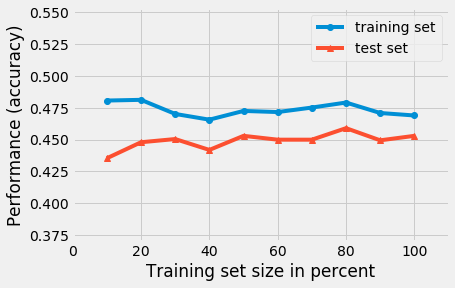

In [69]:
plot_learning_curves(X_train, y_floor_train,
                     X_test, y_floor_test,
                     clf, scoring = 'accuracy',
                     print_model = False)
plt.show()

# Stochastic Gradient Descent

In [70]:
sgd = SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,eta0=0.0, fit_intercept=True, l1_ratio=0.15,learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,n_jobs=1, penalty='l2', power_t=0.5, random_state=None,shuffle=True, tol=None, verbose=0, warm_start=False)

In [71]:
sgd.fit(X_train, y_floor_train)
pred_test_sgd = sgd.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_floor_test, pred_test_sgd)))

Prediction accuracy for the test dataset
89.73%


In [72]:
for i in range(0, 5):
    print('Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_floor_test)[i],pred_test_sgd[i]))

Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 3 and Predicted outcome :: 3
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1


In [74]:
print ('Train Accuracy :: ', accuracy_score(y_floor_train, sgd.predict(X_train)))
print ('Test Accuracy  :: ', accuracy_score(y_floor_test, pred_test_sgd))

Train Accuracy ::  0.9070157771064116
Test Accuracy  ::  0.8973326623049824


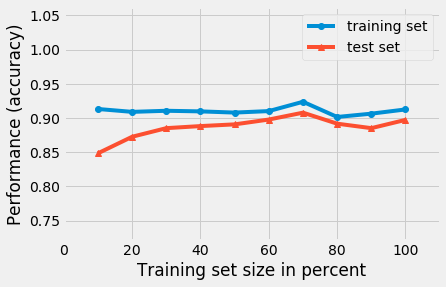

In [75]:
plot_learning_curves(X_train, y_floor_train,
                     X_test, y_floor_test,
                     sgd, scoring = 'accuracy',
                     print_model = False)
plt.show()

# Support Vector Classification

In [76]:
svc = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)

In [77]:
svc.fit(X_train, y_floor_train)
pred_test_svc = svc.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_floor_test, pred_test_svc)))

Prediction accuracy for the test dataset
97.53%


In [78]:
for i in range(0, 5):
    print('Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_floor_test)[i],pred_test_svc[i]))

Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 3 and Predicted outcome :: 3
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1


In [79]:
print ('Train Accuracy :: ', accuracy_score(y_floor_train, svc.predict(X_train)))
print ('Test Accuracy  :: ', accuracy_score(y_floor_test, pred_test_svc))

Train Accuracy ::  0.9875797247398456
Test Accuracy  ::  0.9753397081026673


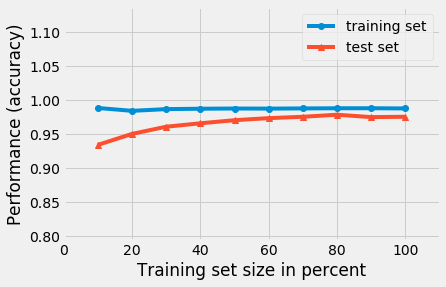

In [80]:
plot_learning_curves(X_train, y_floor_train,
                     X_test, y_floor_test,
                     svc, scoring = 'accuracy',
                     print_model = False)
plt.show()

# SpaceID

In [81]:
X_train = np.array(X_pca_crossval)
y_sp_train = y_crossval['SPACEID']

X_test = np.array(X_pca_holdout)
y_sp_test =  y_holdout['SPACEID']

X_train.shape,y_sp_train.shape,X_test.shape,y_sp_test.shape

((17874, 150), (17874,), (1987, 150), (1987,))

# Random Forest

In [82]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None,min_impurity_split=1e-07, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)

In [83]:
rf.fit(X_train,y_sp_train)
pred_test = rf.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_sp_test, pred_test)))

Prediction accuracy for the test dataset
68.70%


In [84]:
for i in range(0, 5):
    print('Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_sp_test)[i],pred_test[i]))

Actual outcome :: 216 and Predicted outcome :: 216
Actual outcome :: 138 and Predicted outcome :: 138
Actual outcome :: 123 and Predicted outcome :: 124
Actual outcome :: 105 and Predicted outcome :: 105
Actual outcome :: 102 and Predicted outcome :: 103


In [85]:
print ('Train Accuracy :: ', accuracy_score(y_sp_train, rf.predict(X_train)))
print ('Test Accuracy  :: ', accuracy_score(y_sp_test, pred_test))

Train Accuracy ::  0.9701242027526016
Test Accuracy  ::  0.6869652742828385


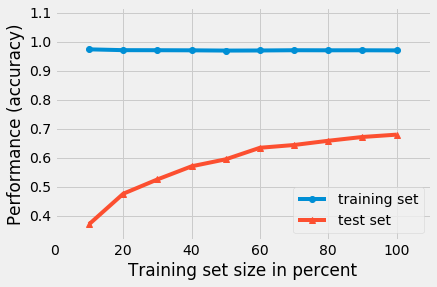

In [86]:
plot_learning_curves(X_train, y_sp_train,
                     X_test, y_sp_test,
                     rf, scoring = 'accuracy',
                     print_model = False)
plt.show()

# Gaussian Naïve Bayes

In [87]:
clf = GaussianNB()

In [88]:
clf.fit(X_train, y_sp_train)
pred_test_gnb = clf.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_sp_test, pred_test_gnb)))

Prediction accuracy for the test dataset
20.79%


In [89]:
for i in range(0, 5):
    print('Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_sp_test)[i],pred_test_gnb[i]))

Actual outcome :: 216 and Predicted outcome :: 216
Actual outcome :: 138 and Predicted outcome :: 139
Actual outcome :: 123 and Predicted outcome :: 123
Actual outcome :: 105 and Predicted outcome :: 102
Actual outcome :: 102 and Predicted outcome :: 103


In [90]:
print ('Train Accuracy :: ', accuracy_score(y_sp_train, clf.predict(X_train)))
print ('Test Accuracy  :: ', accuracy_score(y_sp_test, pred_test_gnb))

Train Accuracy ::  0.25455969564730896
Test Accuracy  ::  0.2078510317060896


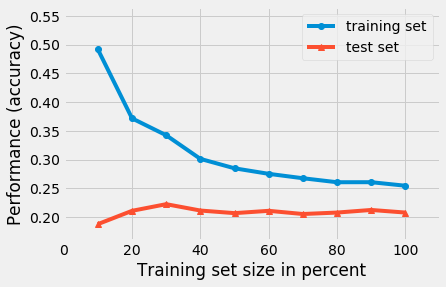

In [91]:
plot_learning_curves(X_train, y_sp_train,
                     X_test, y_sp_test,
                     clf, scoring = 'accuracy',
                     print_model = False)
plt.show()

# Stochastic Gradient Descent

In [92]:
sgd = SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,eta0=0.0, fit_intercept=True, l1_ratio=0.15,learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,n_jobs=1, penalty='l2', power_t=0.5, random_state=None,shuffle=True, tol=None, verbose=0, warm_start=False)

In [93]:
sgd.fit(X_train, y_sp_train)
pred_test_sgd = sgd.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_sp_test, pred_test_sgd)))

Prediction accuracy for the test dataset
34.37%


In [94]:
for i in range(0, 5):
    print('Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_sp_test)[i],pred_test_sgd[i]))

Actual outcome :: 216 and Predicted outcome :: 216
Actual outcome :: 138 and Predicted outcome :: 138
Actual outcome :: 123 and Predicted outcome :: 125
Actual outcome :: 105 and Predicted outcome :: 104
Actual outcome :: 102 and Predicted outcome :: 104


In [95]:
print ('Train Accuracy :: ', accuracy_score(y_sp_train, sgd.predict(X_train)))
print ('Test Accuracy  :: ', accuracy_score(y_sp_test, pred_test_sgd))

Train Accuracy ::  0.39028756853530266
Test Accuracy  ::  0.34373427277302465


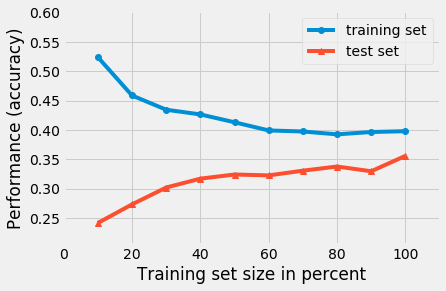

In [96]:
plot_learning_curves(X_train, y_sp_train,
                     X_test, y_sp_test,
                     sgd, scoring = 'accuracy',
                     print_model = False)
plt.show()

# Support Vector Classification

In [97]:
svc = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)

In [98]:
svc.fit(X_train, y_sp_train)
pred_test_svc = svc.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_sp_test, pred_test_svc)))

Prediction accuracy for the test dataset
62.25%


In [99]:
for i in range(0, 5):
    print('Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_sp_test)[i],pred_test_svc[i]))

Actual outcome :: 216 and Predicted outcome :: 216
Actual outcome :: 138 and Predicted outcome :: 138
Actual outcome :: 123 and Predicted outcome :: 124
Actual outcome :: 105 and Predicted outcome :: 105
Actual outcome :: 102 and Predicted outcome :: 103


In [100]:
print ('Train Accuracy :: ', accuracy_score(y_sp_train, svc.predict(X_train)))
print ('Test Accuracy  :: ', accuracy_score(y_sp_test, pred_test_svc))

Train Accuracy ::  0.7471746671142442
Test Accuracy  ::  0.622546552591847


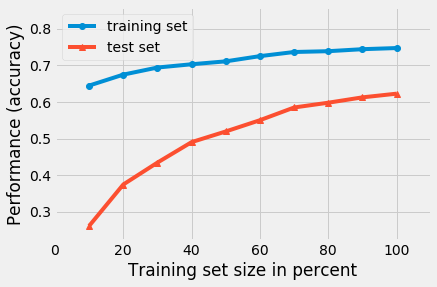

In [101]:
plot_learning_curves(X_train, y_sp_train,
                     X_test, y_sp_test,
                     svc, scoring = 'accuracy',
                     print_model = False)
plt.show()

# Test 

In [102]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None,min_impurity_split=1e-07, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)

In [103]:
rf.fit(X_train,y_sp_train)
pred_test = rf.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_sp_test, pred_test)))

Prediction accuracy for the test dataset
70.01%


In [104]:
for i in range(0, 5):
    print('Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_sp_test)[i],pred_test[i]))

Actual outcome :: 216 and Predicted outcome :: 216
Actual outcome :: 138 and Predicted outcome :: 138
Actual outcome :: 123 and Predicted outcome :: 125
Actual outcome :: 105 and Predicted outcome :: 105
Actual outcome :: 102 and Predicted outcome :: 103


In [108]:
print ('Train Accuracy :: ', accuracy_score(y_sp_train, rf.predict(X_train)))
print ('Test Accuracy  :: ', accuracy_score(y_sp_test, pred_test))

Train Accuracy ::  0.9701242027526016
Test Accuracy  ::  0.7000503271263211


In [107]:
pred_test_s = pd.DataFrame(pred_test)
pred_test_s.to_csv("y_test_spaceid.csv",na_rep = 'NaN')

In [109]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [110]:
rf = RandomForestClassifier()

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_sp_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [ ]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)
Model Performance
Average Error: 3.6561 degrees.
Accuracy = 93.83%.
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
Improvement of 0.50%.